In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import EfficientNetV2L

In [3]:
train_path = 'train/'
test_path = 'test/'

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 10,
                                   shear_range = 0.3,
                                   horizontal_flip = True,
                                   zoom_range = 0.25)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
train_data = train_datagen.flow_from_directory(train_path,
                                               batch_size = 16,
                                               target_size = (224, 224),
                                               shuffle = True)
test_data = test_datagen.flow_from_directory(test_path,
                                             batch_size = 16,
                                             target_size = (224, 224),
                                             shuffle = False)

Found 555 images belonging to 2 classes.
Found 138 images belonging to 2 classes.


In [6]:
baseModel = EfficientNetV2L(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')
baseModel.trainable = True

473176280/473176280 ━━━━━━━━━━━━━━━━━━━━ 77s 0us/step


In [10]:
model = Sequential()
model.add(baseModel)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.33))
model.add(Dense(2, activation = 'softmax'))

In [11]:
adam = Adam(learning_rate = 0.0001)

model.compile(optimizer = adam, loss= 'categorical_crossentropy', metrics = ['accuracy'])

In [12]:
history = model.fit(train_data, epochs = 5, batch_size = 16, validation_data = test_data)

Epoch 1/5


C:\Users\alpnn\AppData\Local\anaconda3\envs\YoloV8\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


35/35 ━━━━━━━━━━━━━━━━━━━━ 550s 11s/step - accuracy: 0.6781 - loss: 0.5372 - val_accuracy: 0.5362 - val_loss: 0.6835
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 383s 11s/step - accuracy: 0.9637 - loss: 0.1289 - val_accuracy: 0.9348 - val_loss: 0.1621
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 388s 11s/step - accuracy: 0.9474 - loss: 0.1101 - val_accuracy: 0.9493 - val_loss: 0.1947
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 382s 11s/step - accuracy: 0.9666 - loss: 0.0952 - val_accuracy: 0.9275 - val_loss: 0.1707
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 376s 11s/step - accuracy: 0.9744 - loss: 0.0829 - val_accuracy: 0.9420 - val_loss: 0.1154


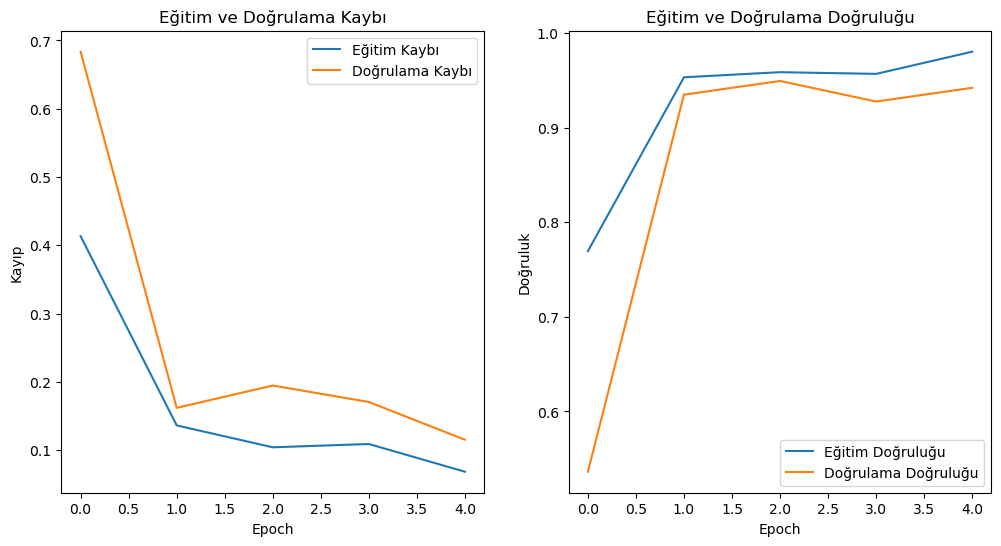

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

plt.show()

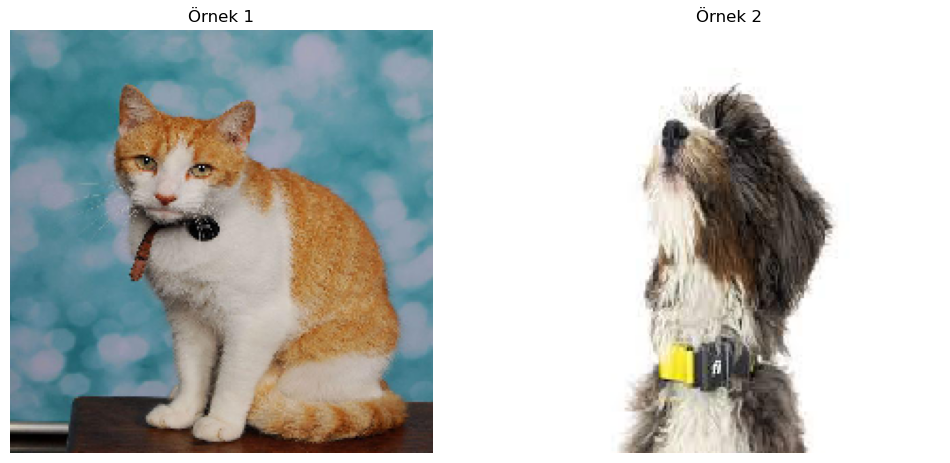

In [14]:
import os
from tensorflow.keras.preprocessing import image

sample_images = ['test/cat_s/cat_1.jpg', 'test/dogs/dog_44.jpg']

plt.figure(figsize=(12, 6))
for i, img_path in enumerate(sample_images):
    img = image.load_img(img_path, target_size=(224, 224))
    plt.subplot(1, len(sample_images), i + 1)
    plt.imshow(img)
    plt.title(f"Örnek {i+1}")
    plt.axis('off')
plt.show()

In [16]:
def prepare_and_predict(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    return prediction

for img_path in sample_images:
    prediction = prepare_and_predict(img_path, model)
    predicted_class = np.argmax(prediction, axis=1)
    confidence = np.max(prediction)
    print(f"Fotoğraf: {img_path}")
    print(f"Tahmin Edilen Sınıf: {predicted_class}, Doğruluk: {confidence}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
Fotoğraf: test/cat_s/cat_1.jpg
Tahmin Edilen Sınıf: [0], Doğruluk: 0.9999850988388062

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Fotoğraf: test/dogs/dog_44.jpg
Tahmin Edilen Sınıf: [1], Doğruluk: 0.9999823570251465

